In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [ ]:
Your Name and PRN:
- Name: ______________________
- PRN : ______________________

# Deep Neural Networks 
## Session A05

## Tensor Flow
- Select number of layers
- Select node in each of the layers
- Choose activation function
- multi-class - digits MNIST dataset (all 60000 images)
- Implement one or more of following to achieve max accuracy.
    - L1/ L2 Regularization
    - Dropout
    - Batch Normalization
    - Early stopping
- Save model

In [16]:
###-----------------
### Import Libraries
###-----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
###-----------------
### Global Variables
###-----------------



In [ ]:
###-----------------
### Hyper Parameters
###-----------------


## Helper Functions

In [ ]:
### Settings so that Tensorflow can not Hog all the GPU memory
physical_devices = tf.config.list_physical_devices('GPU') 
print (f'Physical devices found : {physical_devices}')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [28]:
###-----------------------------------
### Function to plot Loss Curve
###-----------------------------------

def plot_tf_hist(hist_df):
    
    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))
    
    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)
    fontsize=12
    
    # Where was min loss
    best = hist_df[hist_df[hist_df.columns[2]] == hist_df[hist_df.columns[2]].min()]
    
    # pick first axis
    ax = axes[0]
    
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[2]

    # Plot all losses
    hist_df.plot(y = [y1, y2], ax = ax)

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(loss_df.iloc[-1][y1],
                           loss_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)
    
    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y2].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);
    
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]
    
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[3]

    # Plot all losses
    hist_df.plot(y = [y1, y2], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(loss_df.iloc[-1][y1],
                           loss_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y2].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow
    
    
     # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);
    
    # Labels
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()

## Load digits MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png"
         alt="Digits MNIST sprite"  width="600">
  </td></tr>
</table>

In [3]:
# train_filename = os.path.join(inpDir, 'digits_mnist', 'train.csv')
# valid_filename = os.path.join(inpDir, 'digits_mnist', 'validation.csv')

data_df = pd.read_csv("C:/Users/NAIK/Desktop/2. Daily Assignments by the faculty/input/digits_mnist/train.csv")
valid_df = pd.read_csv("C:/Users/NAIK/Desktop/2. Daily Assignments by the faculty/input/digits_mnist/validation.csv")

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_df.shape

(42000, 785)

In [7]:
valid_df.shape

(28000, 784)

In [13]:
x = data_df.drop("label",axis=1)

In [14]:
y= data_df["label"]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [17]:
std = StandardScaler()

In [20]:
x_train=std.fit_transform(x_train)

In [21]:
x_test = std.transform(x_test)

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [22]:
def build_model():
    ###------------------------
    ### Declare your model here
    ###------------------------
    initializer = tf.keras.initializers.GlorotUniform(seed=32)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dense(10)
        
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [23]:
# Create a basic model instance
model = build_model()

## Train the model


In [ ]:
###------------------
### Define call backs
###------------------

checkpoint_dir = os.path.join(modelDir, subDir)

checkpoint_prefix = os.path.join(checkpoint_dir, altName)

model_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                                    monitor='val_loss',
                                                    mode='auto',
                                                    save_weights_only=True,
                                                    save_best_only=True,
                                                    verbose=1)

### Fit the model

In [25]:
history = model.fit(x_train, y_train, 
                    validation_data=[x_test, y_test],
                    epochs=10,
                    verbose=2)

Epoch 1/10
919/919 - 14s - loss: 0.2986 - accuracy: 0.9135 - val_loss: 0.2451 - val_accuracy: 0.9306 - 14s/epoch - 15ms/step
Epoch 2/10
919/919 - 13s - loss: 0.1472 - accuracy: 0.9554 - val_loss: 0.1505 - val_accuracy: 0.9556 - 13s/epoch - 14ms/step
Epoch 3/10
919/919 - 13s - loss: 0.1087 - accuracy: 0.9677 - val_loss: 0.1723 - val_accuracy: 0.9556 - 13s/epoch - 14ms/step
Epoch 4/10
919/919 - 13s - loss: 0.0852 - accuracy: 0.9745 - val_loss: 0.2011 - val_accuracy: 0.9510 - 13s/epoch - 14ms/step
Epoch 5/10
919/919 - 13s - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.1619 - val_accuracy: 0.9609 - 13s/epoch - 14ms/step
Epoch 6/10
919/919 - 13s - loss: 0.0620 - accuracy: 0.9828 - val_loss: 0.1821 - val_accuracy: 0.9637 - 13s/epoch - 14ms/step
Epoch 7/10
919/919 - 13s - loss: 0.0541 - accuracy: 0.9847 - val_loss: 0.1742 - val_accuracy: 0.9606 - 13s/epoch - 14ms/step
Epoch 8/10
919/919 - 13s - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.1753 - val_accuracy: 0.9667 - 13s/epoch - 14ms/step


In [26]:
loss_df = pd.DataFrame(history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.298613,0.913537,0.245113,0.930635
1,0.147214,0.955374,0.150499,0.955635
2,0.108698,0.967653,0.172308,0.955635
3,0.085194,0.974524,0.201083,0.951032
4,0.073935,0.977347,0.161907,0.960873
5,0.062009,0.982823,0.182102,0.963651
6,0.054080,0.984694,0.174222,0.960556
7,0.043708,0.987381,0.175309,0.966667
8,0.042823,0.987857,0.162861,0.967381
9,0.040669,0.989388,0.165075,0.965952


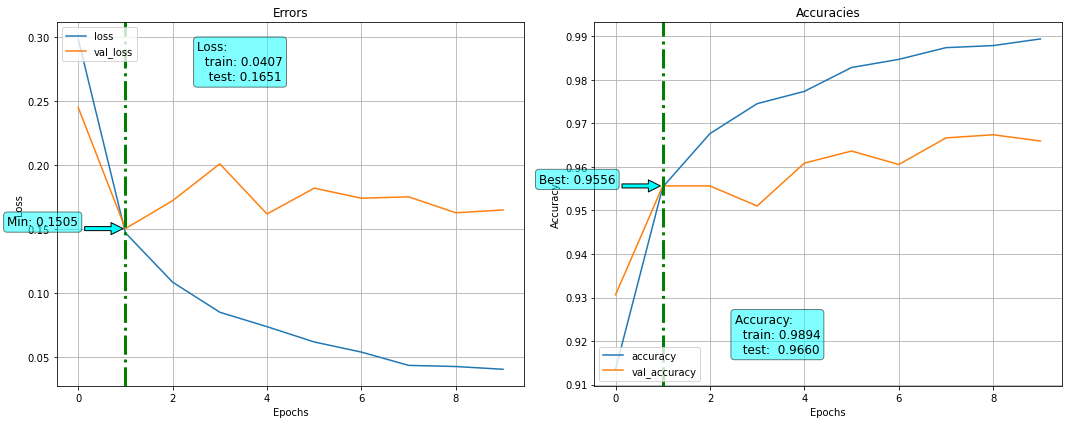

In [29]:
plot_tf_hist(loss_df)

# applying regulization techniques


## l2 regulization


Epoch 1/10
919/919 - 16s - loss: 2.5203 - accuracy: 0.8682 - val_loss: 0.9568 - val_accuracy: 0.8899 - 16s/epoch - 17ms/step
Epoch 2/10
919/919 - 15s - loss: 0.8487 - accuracy: 0.9023 - val_loss: 0.8210 - val_accuracy: 0.9056 - 15s/epoch - 17ms/step
Epoch 3/10
919/919 - 15s - loss: 0.7388 - accuracy: 0.9156 - val_loss: 0.7132 - val_accuracy: 0.9206 - 15s/epoch - 16ms/step
Epoch 4/10
919/919 - 15s - loss: 0.6753 - accuracy: 0.9208 - val_loss: 0.6496 - val_accuracy: 0.9276 - 15s/epoch - 16ms/step
Epoch 5/10
919/919 - 15s - loss: 0.6328 - accuracy: 0.9251 - val_loss: 0.6303 - val_accuracy: 0.9228 - 15s/epoch - 16ms/step
Epoch 6/10
919/919 - 15s - loss: 0.6035 - accuracy: 0.9273 - val_loss: 0.6073 - val_accuracy: 0.9254 - 15s/epoch - 16ms/step
Epoch 7/10
919/919 - 15s - loss: 0.5850 - accuracy: 0.9286 - val_loss: 0.5751 - val_accuracy: 0.9293 - 15s/epoch - 16ms/step
Epoch 8/10
919/919 - 15s - loss: 0.5674 - accuracy: 0.9292 - val_loss: 0.5643 - val_accuracy: 0.9321 - 15s/epoch - 16ms/step


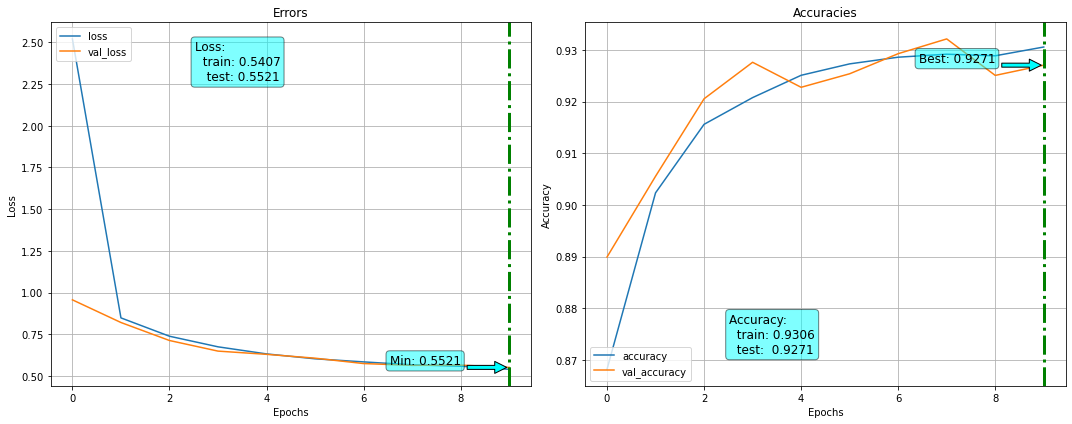

In [32]:

def build_model():
    ###------------------------
    ### Declare your model here
    ###------------------------
    initializer = tf.keras.initializers.GlorotUniform(seed=32)
    regularizer = tf.keras.regularizers.L2(0.02)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784,activation=tf.keras.activations.relu,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10)
        
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

# Create a basic model instance
model = build_model()

## Train the model


###------------------
### Define call backs
###------------------


### Fit the model

history = model.fit(x_train, y_train, 
                    validation_data=[x_test, y_test],
                    epochs=10,
                    verbose=2)

loss_df = pd.DataFrame(history.history)
loss_df

plot_tf_hist(loss_df)

## batch normalization

Epoch 1/10
919/919 - 15s - loss: 0.3144 - accuracy: 0.9064 - val_loss: 0.1673 - val_accuracy: 0.9507 - 15s/epoch - 16ms/step
Epoch 2/10
919/919 - 13s - loss: 0.1565 - accuracy: 0.9526 - val_loss: 0.1377 - val_accuracy: 0.9612 - 13s/epoch - 14ms/step
Epoch 3/10
919/919 - 13s - loss: 0.1173 - accuracy: 0.9623 - val_loss: 0.1252 - val_accuracy: 0.9628 - 13s/epoch - 14ms/step
Epoch 4/10
919/919 - 13s - loss: 0.0947 - accuracy: 0.9696 - val_loss: 0.1195 - val_accuracy: 0.9673 - 13s/epoch - 14ms/step
Epoch 5/10
919/919 - 14s - loss: 0.0760 - accuracy: 0.9751 - val_loss: 0.1255 - val_accuracy: 0.9671 - 14s/epoch - 15ms/step
Epoch 6/10
919/919 - 14s - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.1143 - val_accuracy: 0.9677 - 14s/epoch - 15ms/step
Epoch 7/10
919/919 - 13s - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.1013 - val_accuracy: 0.9736 - 13s/epoch - 14ms/step
Epoch 8/10
919/919 - 13s - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.1291 - val_accuracy: 0.9691 - 13s/epoch - 15ms/step


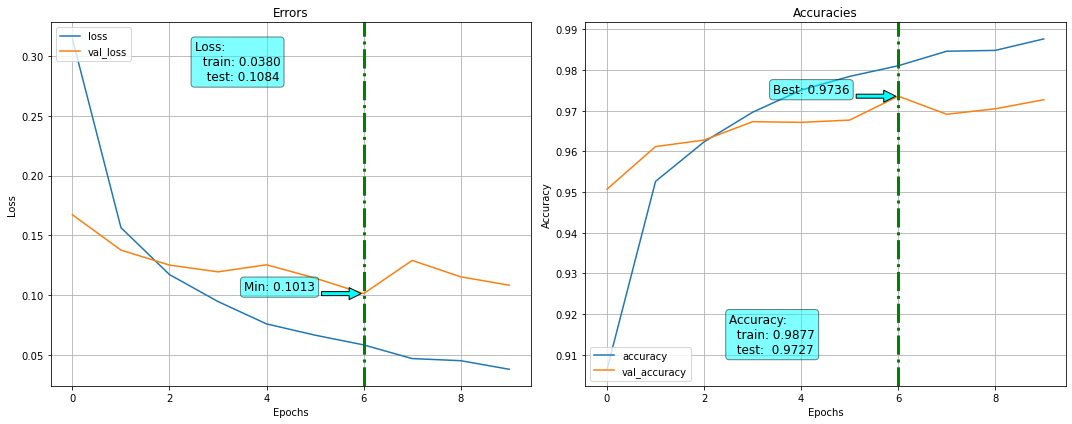

In [33]:

def build_model():
    ###------------------------
    ### Declare your model here
    ###------------------------
    initializer = tf.keras.initializers.GlorotUniform(seed=32)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784,kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
    
        
        tf.keras.layers.Dense(512,kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(256,kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(64,kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10)
        
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

# Create a basic model instance
model = build_model()

## Train the model


### Fit the model

history = model.fit(x_train, y_train, 
                    validation_data=[x_test, y_test],
                    epochs=10,
                    verbose=2)

loss_df = pd.DataFrame(history.history)
loss_df

plot_tf_hist(loss_df)

## Droupouts

Epoch 1/10
919/919 - 15s - loss: 0.5200 - accuracy: 0.8535 - val_loss: 0.2490 - val_accuracy: 0.9348 - 15s/epoch - 16ms/step
Epoch 2/10
919/919 - 14s - loss: 0.2800 - accuracy: 0.9287 - val_loss: 0.2426 - val_accuracy: 0.9361 - 14s/epoch - 15ms/step
Epoch 3/10
919/919 - 14s - loss: 0.2325 - accuracy: 0.9420 - val_loss: 0.2209 - val_accuracy: 0.9460 - 14s/epoch - 15ms/step
Epoch 4/10
919/919 - 13s - loss: 0.2030 - accuracy: 0.9483 - val_loss: 0.1958 - val_accuracy: 0.9549 - 13s/epoch - 15ms/step
Epoch 5/10
919/919 - 14s - loss: 0.1761 - accuracy: 0.9542 - val_loss: 0.1936 - val_accuracy: 0.9584 - 14s/epoch - 15ms/step
Epoch 6/10
919/919 - 14s - loss: 0.1587 - accuracy: 0.9602 - val_loss: 0.1920 - val_accuracy: 0.9586 - 14s/epoch - 15ms/step
Epoch 7/10
919/919 - 14s - loss: 0.1420 - accuracy: 0.9655 - val_loss: 0.2091 - val_accuracy: 0.9618 - 14s/epoch - 15ms/step
Epoch 8/10
919/919 - 14s - loss: 0.1261 - accuracy: 0.9675 - val_loss: 0.2155 - val_accuracy: 0.9655 - 14s/epoch - 15ms/step


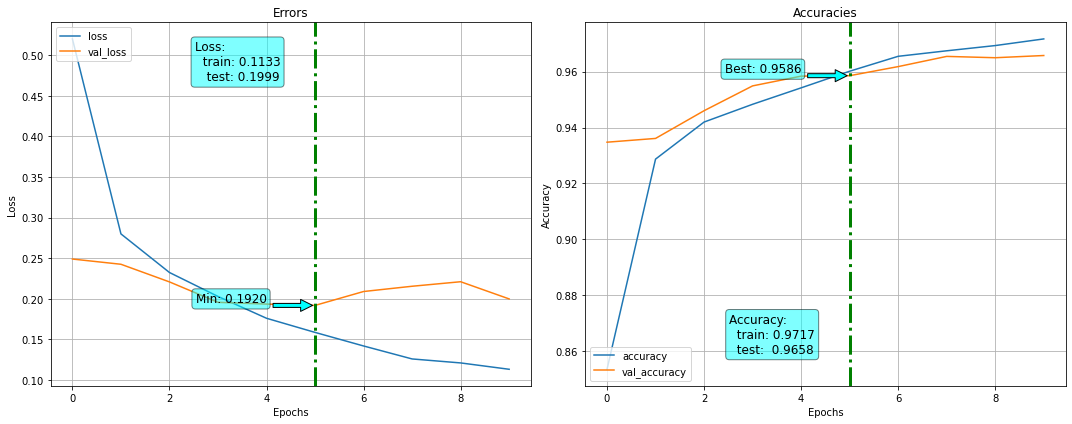

In [34]:

def build_model():
    ###------------------------
    ### Declare your model here
    ###------------------------
    initializer = tf.keras.initializers.GlorotUniform(seed=32)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dropout(0.2,seed = 32),
        tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dropout(0.3,seed = 32),
        tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dropout(0.05,seed = 32),
        tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,kernel_initializer=initializer),
        tf.keras.layers.Dropout(0.5,seed = 32),
        tf.keras.layers.Dense(10)
        
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

# Create a basic model instance
model = build_model()

## Train the model

### Fit the model

history = model.fit(x_train, y_train, 
                    validation_data=[x_test, y_test],
                    epochs=10,
                    verbose=2)

loss_df = pd.DataFrame(history.history)
loss_df

plot_tf_hist(loss_df)

# applying all kind of reguliazation in one

Epoch 1/10
919/919 - 18s - loss: 5.4252 - accuracy: 0.7923 - val_loss: 1.4352 - val_accuracy: 0.8776 - 18s/epoch - 20ms/step
Epoch 2/10
919/919 - 16s - loss: 1.6953 - accuracy: 0.8104 - val_loss: 1.5936 - val_accuracy: 0.8571 - 16s/epoch - 17ms/step
Epoch 3/10
919/919 - 17s - loss: 1.7400 - accuracy: 0.8077 - val_loss: 1.5239 - val_accuracy: 0.8459 - 17s/epoch - 18ms/step
Epoch 4/10
919/919 - 16s - loss: 1.7323 - accuracy: 0.8136 - val_loss: 1.6458 - val_accuracy: 0.8155 - 16s/epoch - 18ms/step
Epoch 5/10
919/919 - 18s - loss: 1.7050 - accuracy: 0.8146 - val_loss: 1.5185 - val_accuracy: 0.8656 - 18s/epoch - 19ms/step
Epoch 6/10
919/919 - 21s - loss: 1.6947 - accuracy: 0.8161 - val_loss: 1.4768 - val_accuracy: 0.8776 - 21s/epoch - 22ms/step
Epoch 7/10
919/919 - 18s - loss: 1.6676 - accuracy: 0.8213 - val_loss: 1.4156 - val_accuracy: 0.8787 - 18s/epoch - 20ms/step
Epoch 8/10
919/919 - 18s - loss: 1.6060 - accuracy: 0.8280 - val_loss: 1.3928 - val_accuracy: 0.8899 - 18s/epoch - 20ms/step


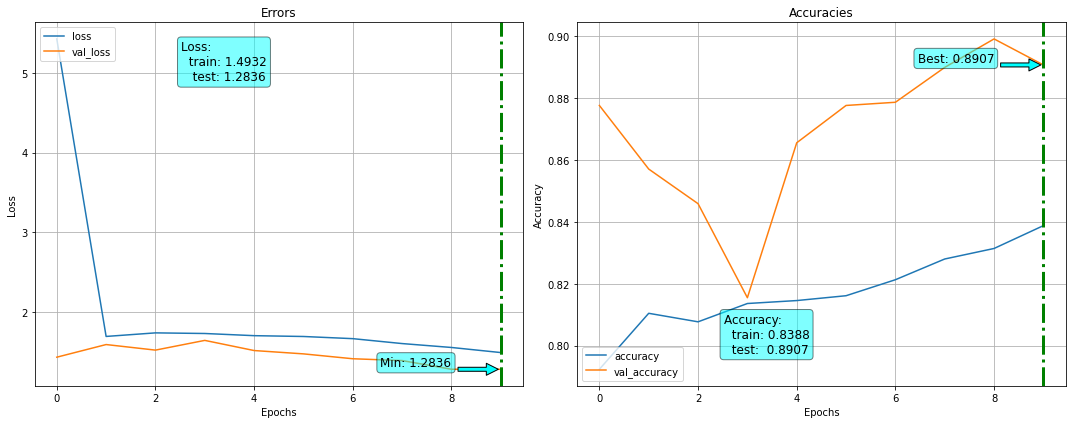

In [36]:

def build_model():
    ###------------------------
    ### Declare your model here
    ###------------------------
    initializer = tf.keras.initializers.GlorotUniform(seed=32)
    regularizer = tf.keras.regularizers.L2(0.02)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2,seed = 32),
    
        tf.keras.layers.Dense(512,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3,seed = 32),
        tf.keras.layers.Dense(256,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.05,seed = 32),
        tf.keras.layers.Dense(64,kernel_initializer=initializer,kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10)
        
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

# Create a basic model instance
model = build_model()

## Train the model

### Fit the model

history = model.fit(x_train, y_train, 
                    validation_data=[x_test, y_test],
                    epochs=10,
                    verbose=2)

loss_df = pd.DataFrame(history.history)
loss_df

plot_tf_hist(loss_df)

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [31]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy: {:5.2f}'.format(100 * test_acc))

394/394 - 1s - loss: 0.1651 - accuracy: 0.9660 - 1s/epoch - 3ms/step
Test accuracy: 96.60


### Note:
Above accuracy is post last iteration and not based on best weights.
Best weights are saved in checkpoint during the training.

In [ ]:
best = tf.train.latest_checkpoint(checkpoint_dir)
best

In [ ]:
# Create a new model instance
model1 = build_model()

# Load the previously saved weights
model1.load_weights(best)

# Re-evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))